<a href="https://colab.research.google.com/github/patrickcap/DEPART/blob/main/DEPART_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEPART: Data exploration and preliminary ML model train

__D__elay __E__stimation and __P__rediction for __A__ircraft __R__outing and __T__imes.



## 0.1 Dataset

The LATAM airlines data is a real, public dataset that contains flight data of some scheduled flights departing from Arturo Merino Benitez International (SCL) Airport, Chile.

The dataset contains data on __68206__ flights and collects information on he following 20 variables:


| Column      | Description                                     |
|-------------|-------------------------------------------------|
| `Fecha-I`   | Scheduled date and time of the flight.          |
| `Vlo-I`     | Scheduled flight number.                        |
| `Ori-I`     | Programmed origin city code.                    |
| `Des-I`     | Programmed destination city code.               |
| `Emp-I`     | Scheduled flight airline code.                  |
| `Fecha-O`   | Date and time of flight operation.              |
| `Vlo-O`     | Flight operation number of the flight.          |
| `Ori-O`     | Operation origin city code.                     |
| `Des-O`     | Operation destination city code.                |
| `Emp-O`     | Airline code of the operated flight.            |
| `DIA`       | Day of the month of flight operation.           |
| `MES`       | Number of the month of operation of the flight. |
| `AÑO`       | Year of flight operation.                       |
| `DIANOM`    | Day of the week of flight operation.            |
| `TIPOVUELO` | Type of flight, I =International, N =National.  |
| `OPERA`     | Name of the airline that operates.              |
| `SIGLAORI`  | Name city of origin.                            |
| `SIGLADES`  | Destination city name.                          |



## 0.2. Machine Learning check-list

In this Ml project we will follow these steps:

- Get the dataset
- Understand the data, the attributes and their correlations
- Split the data into train and test set
- Apply normalisation, scaling and other transformations to the attributes if needed
- Build a machine learning model
- Evaluate the model and investigate the errors
- Tune your model to improve performance

## 0.3. Prerequisites - TODO: complete/edit

- `Pandas` for easy data uploading and manipulation.
- `Matplotlib`: for visualisations.
- `NumPy` and `SciPy`: for scietinfic programming.
- `Scikit-learn`: for machine learning algorithms.

## 1. Uploading and inspecting the data

First, upload the dataset using `Pandas` and define a function pointing to the location of the `.csv` file:

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_data(data_path):
  return pd.read_csv(data_path)

In [ ]:
csv_path = '/content/drive/My Drive/Woodcock_Project/data.csv'
df = load_data(csv_path)

df.head()

<ipython-input-2-7c062becb09d>:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(data_path)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


We can rename the features in order to following naming Python conventions and change the language to English, making them more understandable.

In [ ]:
df = df.rename(columns={"Fecha-I":"sched_date_time",
                          "Vlo-I":"sched_flight_num",
                          "Ori-I":"sched_OG_city_code",
                          "Des-I":"sched_destination_city_code",
                          "Emp-I":"sched_airlinecode",
                          "Fecha-O": "actual_date_time",
                          "Vlo-O":"actual_flight_num",
                          "Ori-O":"actual_OG_city_code",
                          "Des-O":"actual_destination_city_code",
                          "Emp-O":"actual_airline_code",
                          "DIA":"actual_flight_day",
                          "MES":"actual_flight_month",
                          "AÑO":"actual_flight_year",
                          "DIANOM":"dayof_week_actual_flight",
                          "TIPOVUELO":"flight_type",
                          "OPERA":"airline",
                          "SIGLAORI":"OG_city",
                          "SIGLADES":"dest_city"
                          })

We can now print the summary information about the number of instances and attributes in the dataset. Using `.info()` we can also inspect the attribute's types and number of non-null values.

The attribute types below suggest that most variables are __categorical__ (i.e. object type). ML algorithms prefer to work with numerical data, so we might want to consider casting categorical data as numerical.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   sched_date_time               68206 non-null  object
 1   sched_flight_num              68206 non-null  object
 2   sched_OG_city_code            68206 non-null  object
 3   sched_destination_city_code   68206 non-null  object
 4   sched_airlinecode             68206 non-null  object
 5   actual_date_time              68206 non-null  object
 6   actual_flight_num             68205 non-null  object
 7   actual_OG_city_code           68206 non-null  object
 8   actual_destination_city_code  68206 non-null  object
 9   actual_airline_code           68206 non-null  object
 10  actual_flight_day             68206 non-null  int64 
 11  actual_flight_month           68206 non-null  int64 
 12  actual_flight_year            68206 non-null  int64 
 13  dayof_week_actua

### Feature Engineering: Computing `delay` column

The dataset doesn't provide information about delays directly, so we must compute a new feature that indicates whether a flight was delayed or not before splitting the data into train and test set.

We must process dates and times first, as they are stored as strings. This allows us to use operators to compare dates in a meaningful way.

In [ ]:
def compute_delay(actual_date_time, sched_date_time):

  return int(actual_date_time > sched_date_time)

# Test compute_delay
# time1 = pd.to_datetime('2017-05-31 18:25:00', format = '%Y-%m-%d %H:%M:%S', errors='raise')
# time2 = pd.to_datetime('2017-05-31 18:28:00', format = '%Y-%m-%d %H:%M:%S', errors='raise')
# compute_delay(time2, time1)

We can now add a new column (feature) to the dataset to store a boolen value indicating whether the flight was delayed.

The flags indicate the following:
- __0__: the flight wasn't delayed.
- __1__: the flight __was__ delayed.

In [ ]:
df['delay'] = ''
df_copy = df.copy()

for index, row in df.iterrows():
    df_copy.at[index, 'delay'] = compute_delay(pd.to_datetime(row['actual_date_time'],
                                                              format = '%Y-%m-%d %H:%M:%S',
                                                              errors='raise'),
                                               pd.to_datetime(row['sched_date_time'],
                                                              format = '%Y-%m-%d %H:%M:%S',
                                                              errors='raise'))

df = df_copy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   sched_date_time               68206 non-null  object
 1   sched_flight_num              68206 non-null  object
 2   sched_OG_city_code            68206 non-null  object
 3   sched_destination_city_code   68206 non-null  object
 4   sched_airlinecode             68206 non-null  object
 5   actual_date_time              68206 non-null  object
 6   actual_flight_num             68205 non-null  object
 7   actual_OG_city_code           68206 non-null  object
 8   actual_destination_city_code  68206 non-null  object
 9   actual_airline_code           68206 non-null  object
 10  actual_flight_day             68206 non-null  int64 
 11  actual_flight_month           68206 non-null  int64 
 12  actual_flight_year            68206 non-null  int64 
 13  dayof_week_actua

Now we can __visualise__ the number of __delayed flights__ in our dataset.


In [ ]:
df.delay.value_counts()

1    45507
0    22699
Name: delay, dtype: int64

([<matplotlib.patches.Wedge at 0x7b0d78defa00>,
 [Text(-0.5515934967553773, 0.9517061596612558, '1'),
  Text(0.5515934967553775, -0.9517061596612557, '0')],
 [Text(-0.30086918004838753, 0.5191124507243213, '66.72%'),
  Text(0.3008691800483877, -0.5191124507243212, '33.28%')])

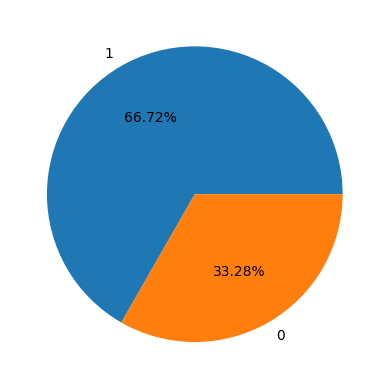

In [ ]:
plt.pie(df.delay.value_counts(),labels=df.delay.unique(),autopct = '%1.2f%%')

Here we note that the given dataset has unequal distribution of target variables, more than half of the instances correspond to delayed flights. We should try to keep this proportion when doing the train/test split.

## 2. Splitting the data into train and test sets

We will use a train/test dataset split of 80% and 20%, respectively. Given the small size of the dataset, we will use *stratified sampling* to avoid sampling bias. This will help ensure the distributions of the instance attributes in the different subsets are similar.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["delay"]):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

The resulting proportion can be visualized below:

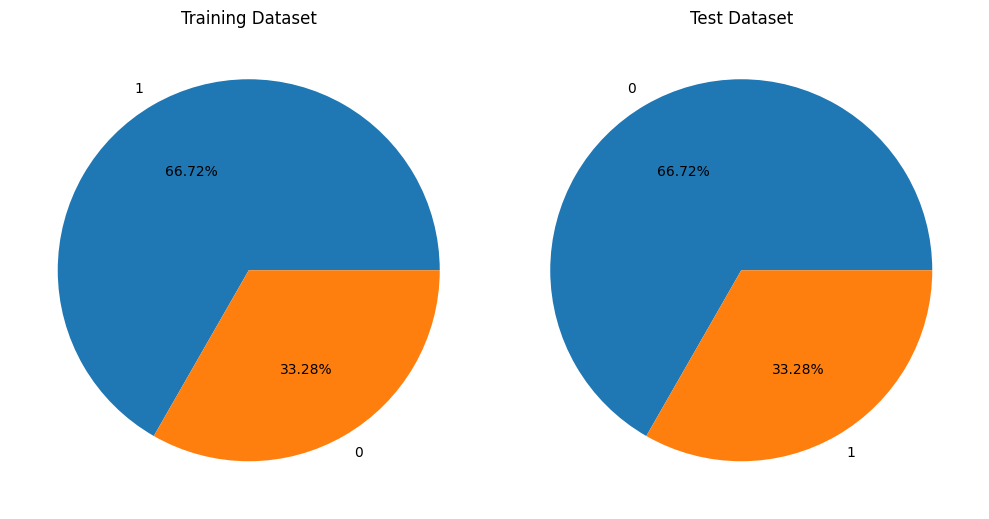

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.pie(strat_train_set.delay.value_counts(),labels=strat_train_set.delay.unique(),autopct = '%1.2f%%')
plt.title('Training Dataset')

plt.subplot(122)
plt.pie(strat_test_set.delay.value_counts(),labels=strat_test_set.delay.unique(),autopct = '%1.2f%%')
plt.title('Test Dataset')

plt.tight_layout()

We can now separate the delay labels:

In [ ]:
train_labels = strat_train_set['delay'].copy()
train_data = strat_train_set.drop('delay', axis=1)

test_labels = strat_test_set['delay'].copy()
test_data = strat_test_set.drop('delay', axis=1)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


## 3. Exploring the attributes
The next step is to look more closely into the attributes and gain insights into the data.

### Visualize Data

Over 50% of flights are by LAN flights, 0.001% are by LAP.

100% of TPU flights are delays compared to 20% of UAL flights.

*We will need to check when we run the model that it's able to generalize.

#### Visualize Frequency of Flights per Tag

Note: Originating City Codes are ALL SCEL, so only focused on destination  

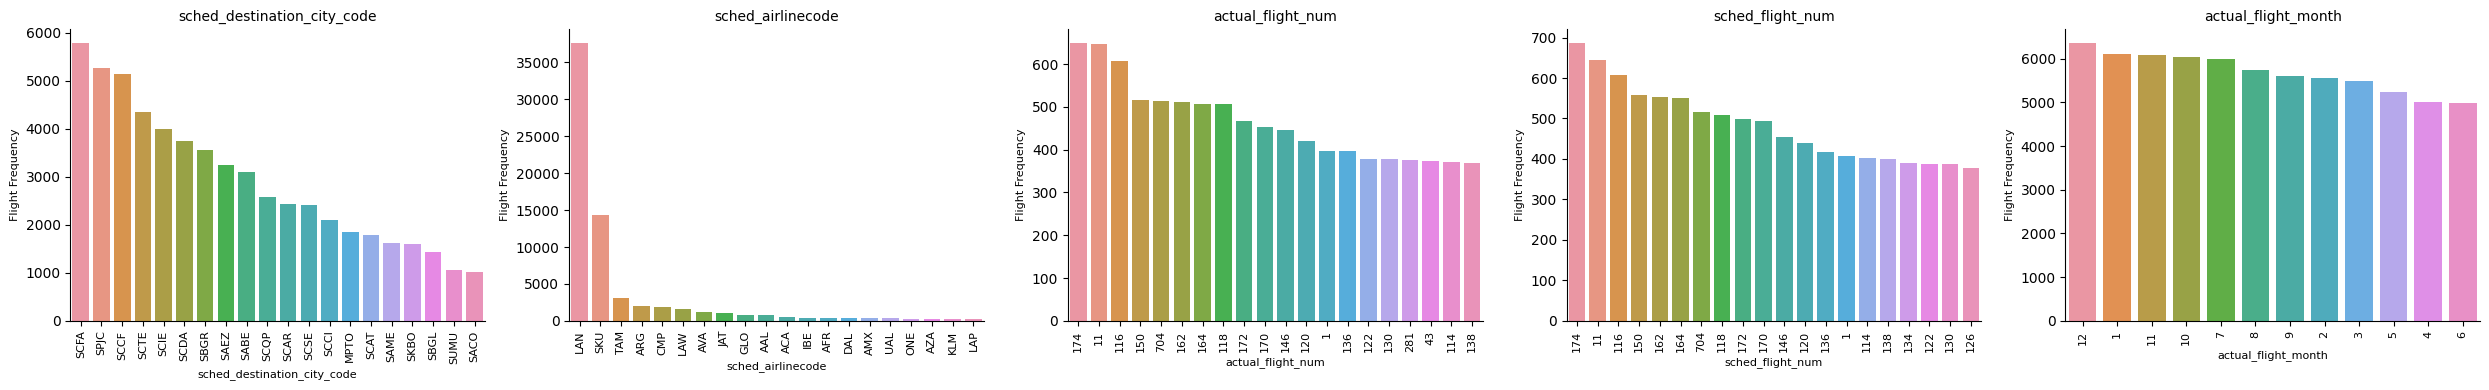

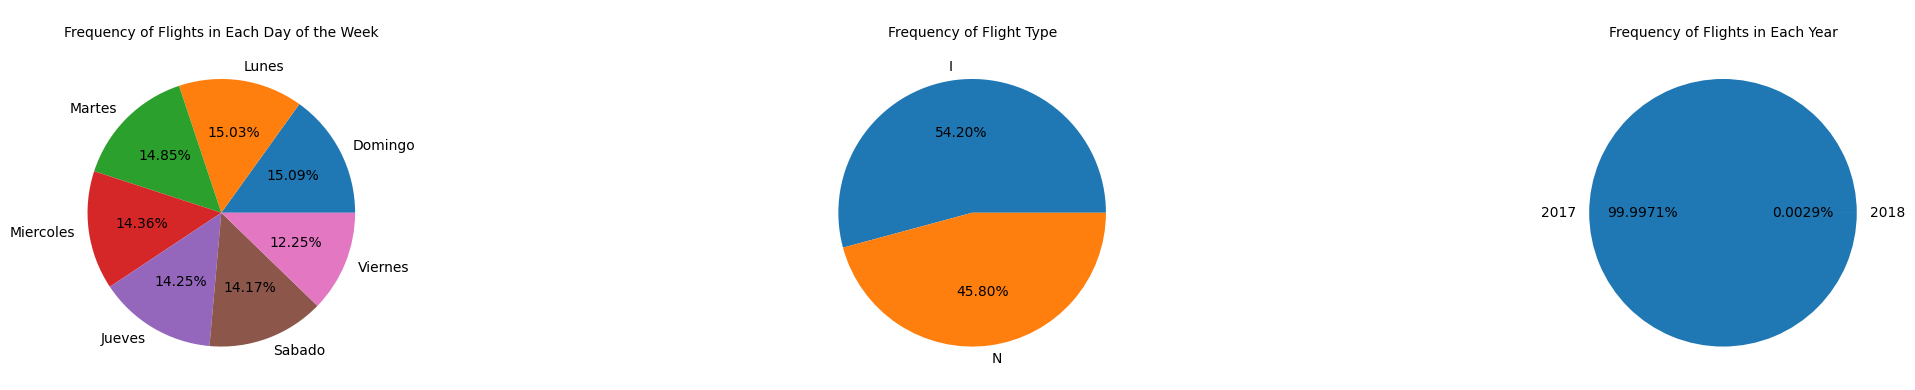

In [ ]:
import seaborn as sns

rot = 90
num_show = 20
axisfont = 8
font = 10

feat =['sched_destination_city_code', 'sched_airlinecode','actual_flight_num','sched_flight_num','actual_flight_month']

fig, axs = plt.subplots(1, len(feat), figsize=(25,4))

for i in feat:
  a = sns.countplot(ax = axs[feat.index(i)], x = df[i], order=df[i].value_counts(ascending=False).iloc[:num_show].index)
  sns.despine()
  axs[feat.index(i)].set_title(i, fontsize = font)
  axs[feat.index(i)].set_ylabel("Flight Frequency", fontsize = axisfont)
  axs[feat.index(i)].set_xlabel(i, fontsize = axisfont)
  axs[feat.index(i)].tick_params(axis='x', labelrotation = rot, labelsize = axisfont)


fig.tight_layout()


fig2, axs = plt.subplots(1, 3, figsize=(25,4))
# Flights per Day of the Week
axs[0].pie(df.dayof_week_actual_flight.value_counts(),labels=df.dayof_week_actual_flight.unique(),autopct = '%1.2f%%')
axs[0].set_title("\n""Frequency of Flights in Each Day of the Week", fontsize = font)

# Flights per Flight Type
axs[1].pie(df.flight_type.value_counts(),labels=df.flight_type.unique(),autopct = '%1.2f%%')
axs[1].set_title("\n""Frequency of Flight Type", fontsize = font)

# Flights per Year
axs[2].pie(df.actual_flight_year.value_counts(),labels=df.actual_flight_year.unique(),autopct = '%1.4f%%')
axs[2].set_title("\n""Frequency of Flights in Each Year", fontsize = font)

fig2.tight_layout()



####Visualize Frequency of Delays per Tag

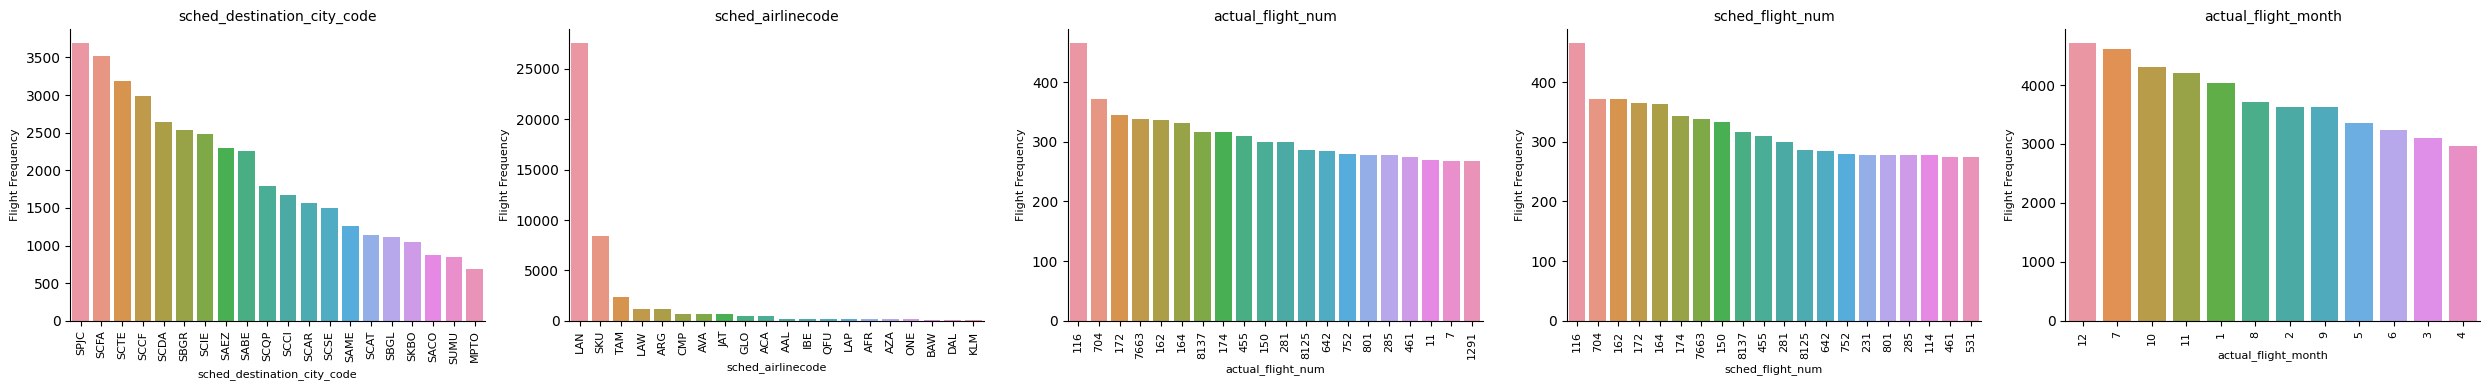

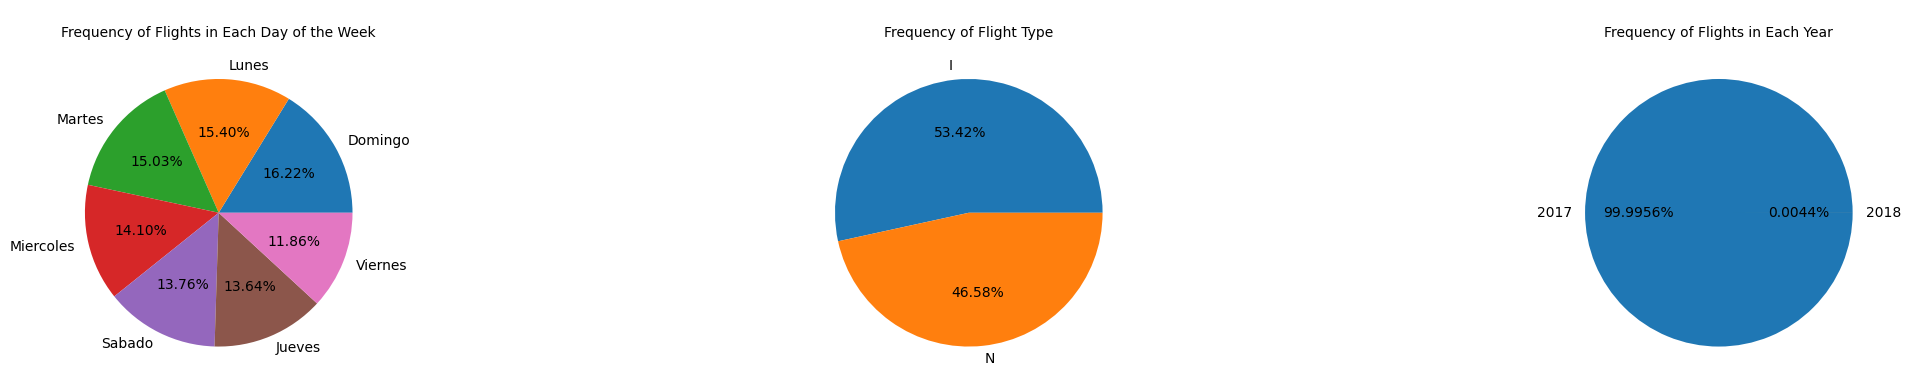

In [ ]:
delayed_df = df.drop(df[df['delay'] == 0].index)


rot = 90
num_show = 20
axisfont = 8
font = 10

feat =['sched_destination_city_code', 'sched_airlinecode','actual_flight_num','sched_flight_num','actual_flight_month']

fig, axs = plt.subplots(1, len(feat), figsize=(25,4))

for i in feat:
  sns.countplot(ax = axs[feat.index(i)], x = delayed_df[i], order=delayed_df[i].value_counts(ascending=False).iloc[:num_show].index)
  sns.despine()
  axs[feat.index(i)].set_title(i, fontsize = font)
  axs[feat.index(i)].set_ylabel("Flight Frequency", fontsize = axisfont)
  axs[feat.index(i)].set_xlabel(i, fontsize = axisfont)
  axs[feat.index(i)].tick_params(axis='x', labelrotation = rot, labelsize = axisfont)

fig.tight_layout()


fig2, axs = plt.subplots(1, 3, figsize=(25,4))
# Flights per Day of the Week
axs[0].pie(delayed_df.dayof_week_actual_flight.value_counts(),labels=delayed_df.dayof_week_actual_flight.unique(),autopct = '%1.2f%%')
axs[0].set_title("\n""Frequency of Flights in Each Day of the Week", fontsize = font)

# Flights per Flight Type
axs[1].pie(delayed_df.flight_type.value_counts(),labels=delayed_df.flight_type.unique(),autopct = '%1.2f%%')
axs[1].set_title("\n""Frequency of Flight Type", fontsize = font)

# Flights per Year
axs[2].pie(delayed_df.actual_flight_year.value_counts(),labels=delayed_df.actual_flight_year.unique(),autopct = '%1.4f%%')
axs[2].set_title("\n""Frequency of Flights in Each Year", fontsize = font)

fig2.tight_layout()


####Combined (Delays per Flight per Tag)


Delays per Airline

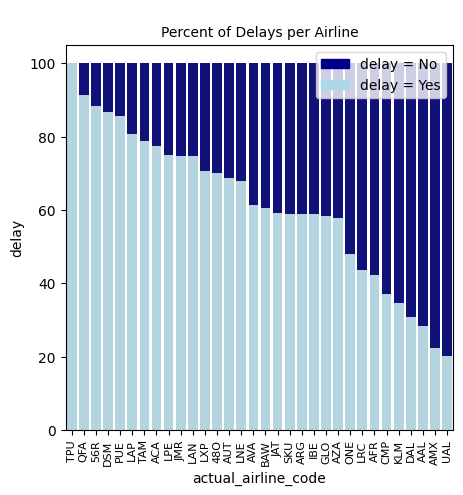

In [ ]:
num_show_percent = 50
import matplotlib.patches as mpatches


def raw_to_percentage(df, column, d):
  total = df.groupby(column)[d].count().reset_index()
  delay = df[df.delay==1].groupby(column)[d].count().reset_index()
  delay[d] = [i / j * 100 for i,j in zip(delay[d], total[d])]
  total[d] = [i / j * 100 for i,j in zip(total[d], total[d])]
  return delay, total


#Airline
# set the figure size
plt.figure(figsize=(5, 5))
#raw to percentage
airline_delay, airline_total = raw_to_percentage(df, 'actual_airline_code', 'delay')
# bar chart 1 -> top bars ('delay=No')
bar1 = sns.barplot(x="actual_airline_code",  y="delay", data=airline_total.head(num_show_percent), color='darkblue')
# bar chart 2 -> bottom bars ('delay=Yes')
bar2 = sns.barplot(x="actual_airline_code", y="delay", data=airline_delay.sort_values(by=['delay'],ascending = False).head(num_show_percent), color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='delay = No')
bottom_bar = mpatches.Patch(color='lightblue', label='delay = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.tick_params(axis='x', labelrotation = rot, labelsize = axisfont)
plt.title("\n""Percent of Delays per Airline" , fontsize = font)
# show the graph
plt.show()





Delays per Day of the Week

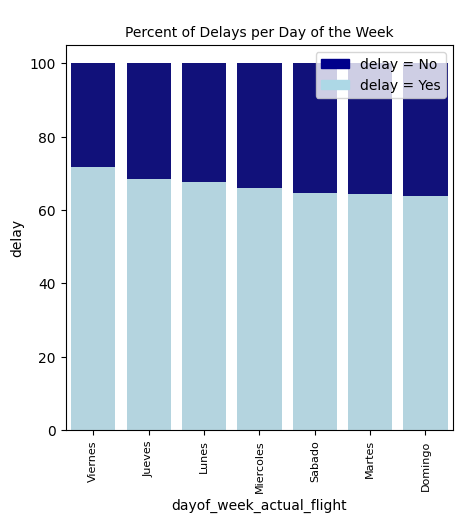

In [ ]:
#Day of the Week
# set the figure size
plt.figure(figsize=(5, 5))

day_of_week_delay, day_of_week_total = raw_to_percentage(df, 'dayof_week_actual_flight', 'delay')
# bar chart 1 -> top bars ('delay=No')
bar1 = sns.barplot(x="dayof_week_actual_flight",  y="delay", data=day_of_week_total.head(num_show_percent), color='darkblue')
# bar chart 2 -> bottom bars ('delay=Yes')
bar2 = sns.barplot(x="dayof_week_actual_flight", y="delay", data=day_of_week_delay.sort_values(by=['delay'],ascending = False).head(num_show_percent), color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='delay = No')
bottom_bar = mpatches.Patch(color='lightblue', label='delay = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.tick_params(axis='x', labelrotation = rot, labelsize = axisfont)
plt.title("\n""Percent of Delays per Day of the Week" , fontsize = font)
# show the graph
plt.show()

Delays per Month

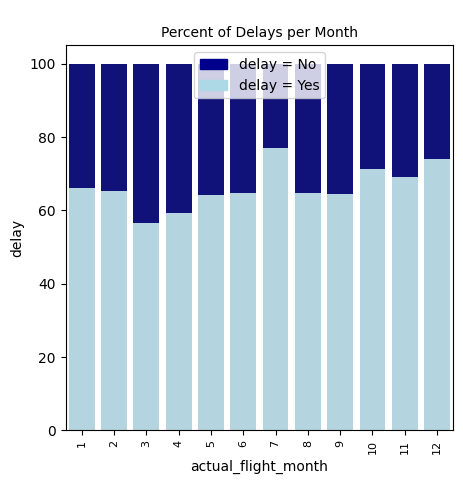

In [ ]:
#Month
# set the figure size
plt.figure(figsize=(5, 5))

month_delay, month_total = raw_to_percentage(df, 'actual_flight_month', 'delay')
# bar chart 1 -> top bars ('delay=No')
bar1 = sns.barplot(x="actual_flight_month",  y="delay", data=month_total.head(num_show_percent), color='darkblue')
# bar chart 2 -> bottom bars ('delay=Yes')
bar2 = sns.barplot(x="actual_flight_month", y="delay", data=month_delay.sort_values(by=['delay'],ascending = False).head(num_show_percent), color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='delay = No')
bottom_bar = mpatches.Patch(color='lightblue', label='delay = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.tick_params(axis='x', labelrotation = rot, labelsize = axisfont)
plt.title("\n""Percent of Delays per Month" , fontsize = font)
# show the graph
plt.show()

### Uninformative features

It would make sense if the scheduled and actual flight number columns were the same. However, there are some instances where these values don't match. A change in flight number could indicate a delay, as airlines modify the flight numbers when changing the type of aircraft, for example.

In [ ]:
# Show and count the instances in which the flight numbers are not the same
total = 0
delay_count = 0

for index, row in df.iterrows():
  if row['sched_flight_num'] != row['actual_flight_num']:
    total += 1
    delay_count += row['delay']
    # print('sched_flight_num: ', row['sched_flight_num'], 'actual_flight_num: ', row['actual_flight_num'], 'delay: ', row['delay'])

print(f'Size of dataset: {df.shape[0]}')
print(f'Percentage of flights with different scheduled and actual flight numbers: {total/df.shape[0] * 100}')
print(f'Number of instances with different scheduled and actual flight numbers: {total}')
print(f'Percentage of delayed flights in the subset where scheduled and actual flight numbers are different: {delay_count/total * 100}')

Size of dataset: 68206
Percentage of flights with different scheduled and actual flight numbers: 2.7123713456294167
Number of instances with different scheduled and actual flight numbers: 1850
Percentage of delayed flights in the subset where scheduled and actual flight numbers are different: 78.16216216216216


The `sched_destination_city_code` and `actual_destination_city_code` variables don't always match. However, the number of instances where this happens might not be significant enough to be informative.

In [ ]:
# Show and count the instances in which the destination city codes are not the same
total = 0
delay_count = 0

for index, row in df.iterrows():
  if row['sched_destination_city_code'] != row['actual_destination_city_code']:
    total += 1
    delay_count += row['delay']
    # print('sched_destination_city_code: ', row['sched_destination_city_code'], 'actual_destination_city_code: ', row['actual_destination_city_code'], 'delay: ', row['delay'])

print(f'Size of dataset: {df.shape[0]}')
print(f'Percentage of flights with different scheduled and actual destination city codes: {total/df.shape[0] * 100}')
print(f'Number of instances with different scheduled and actual destination city codes: {total}')
print(f'Percentage of delayed flights in the subset where scheduled and actual destination city codes are different: {delay_count/total * 100}')

Size of dataset: 68206
Percentage of flights with different scheduled and actual destination city codes: 0.041052106852769554
Number of instances with different scheduled and actual destination city codes: 28
Percentage of delayed flights in the subset where scheduled and actual destination city codes are different: 78.57142857142857


As shown below, the scheduled and actual airline codes columns are not the same. These differences occur a lot more frequently than the ones shown above, so a model might be able to identify if a change in airline codes is correlated with a delay.

In [ ]:
# Show and count the instances in which the airline codes are not the same
total = 0
delay_count = 0

for index, row in df.iterrows():
  if row['sched_airlinecode'] != row['actual_airline_code']:
    total += 1
    delay_count += row['delay']
    # print('sched_airlinecode: ', row['sched_airlinecode'], 'actual_airline_code: ', row['actual_airline_code'], 'delay: ', row['delay'])

print(f'Size of dataset: {df.shape[0]}')
print(f'Percentage of flights with different scheduled and actual airline codes: {total/df.shape[0] * 100}')
print(f'Number of instances with different scheduled and actual airline codes: {total}')
print(f'Percentage of delayed flights in the subset where scheduled and actual airline codes are different: {delay_count/total * 100}')

Size of dataset: 68206
Percentage of flights with different scheduled and actual airline codes: 27.3714922440841
Number of instances with different scheduled and actual airline codes: 18669
Percentage of delayed flights in the subset where scheduled and actual airline codes are different: 71.50356205474316


These observations won't be taken into account in our model design. We would like to build a system that can make predictions on real time data before a flight departs, which means actual flight flight data will be unavailable at the time of making predictions.

If our system is able to predict delays in advance, airport staff and airlines might have a bigger time margin to find a way to mitigate the knock-on effects of a delayed flight.

## 4. Data preparation and transformations for machine learning algorithms¶

Now we are almost ready to implement an initial regression algorithm for the task at hand. However, there are a couple of other things to address, in particular:

- Handle missing values if there are any.
- Convert all attribute values (e.g. categorical, textual) into numerical format;

### Handling missing values
So far we can see that one row is __missing the value__ for the `actual_flight_num variable`. Since this only happens once, we can just drop that instance.

In [ ]:
# Drop the examples with null values
df = df.dropna(subset=["actual_flight_num"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   sched_date_time               68205 non-null  object
 1   sched_flight_num              68205 non-null  object
 2   sched_OG_city_code            68205 non-null  object
 3   sched_destination_city_code   68205 non-null  object
 4   sched_airlinecode             68205 non-null  object
 5   actual_date_time              68205 non-null  object
 6   actual_flight_num             68205 non-null  object
 7   actual_OG_city_code           68205 non-null  object
 8   actual_destination_city_code  68205 non-null  object
 9   actual_airline_code           68205 non-null  object
 10  actual_flight_day             68205 non-null  int64 
 11  actual_flight_month           68205 non-null  int64 
 12  actual_flight_year            68205 non-null  int64 
 13  dayof_week_actua

### Handling date and time attributes

We will need the scheduled departure times and actual departure times to be stored as internal datetimes instead of strings. This will make extracting the day, month, hour, etc a lot easier.

 We will also store the month, day, hour, minute and day of the week as they may be useful to calculate other features.

In [ ]:
def process_date_time(df):
  df['sched_date_time'] = pd.to_datetime(df['sched_date_time'],
                                        format = '%Y-%m-%d %H:%M:%S',
                                        errors='raise')

  df['actual_date_time'] = pd.to_datetime(df['actual_date_time'],
                                        format = '%Y-%m-%d %H:%M:%S',
                                        errors='raise')

  df['sched_flight_hour'] = df['sched_date_time'].dt.hour
  df['sched_flight_minute'] = df['sched_date_time'].dt.minute
  df['sched_flight_dayofweek'] = df['sched_date_time'].dt.dayofweek

  # df['actual_flight_hour'] = df['actual_date_time'].dt.hour
  # df['actual_flight_minute'] = df['actual_date_time'].dt.minute
  # df['actual_flight_dayofweek'] = df['actual_date_time'].dt.dayofweek

  return df

process_date_time(df)

df.head()
df.info()

<ipython-input-23-0ea34462b415>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sched_date_time'] = pd.to_datetime(df['sched_date_time'],
<ipython-input-23-0ea34462b415>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_date_time'] = pd.to_datetime(df['actual_date_time'],
<ipython-input-23-0ea34462b415>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   sched_date_time               68205 non-null  datetime64[ns]
 1   sched_flight_num              68205 non-null  object        
 2   sched_OG_city_code            68205 non-null  object        
 3   sched_destination_city_code   68205 non-null  object        
 4   sched_airlinecode             68205 non-null  object        
 5   actual_date_time              68205 non-null  datetime64[ns]
 6   actual_flight_num             68205 non-null  object        
 7   actual_OG_city_code           68205 non-null  object        
 8   actual_destination_city_code  68205 non-null  object        
 9   actual_airline_code           68205 non-null  object        
 10  actual_flight_day             68205 non-null  int64         
 11  actual_flight_month         

### Drop uninformative features

After some further inspection of the features we have decided to drop the following features from our dataset:

- `sched_OG_city_code` and `actual_OG_city_code`: these are the same across the whole dataset, they inform us that all flights depart from Arturo Merino Benitez International (SCL) Airport. If the information is the same across all instances, these features won't have any discriminative power.

- `dest_city` and `airline`: this information will already be encoded in the destination city and airline.

- `OG_city`: this variable is the same across the whole dataset, thus it's not informative for our task.

- `dayof_week_actual_flight`: this contains categorical textual data, we will use the day of the week variable we extracted with `pd.to_datetime`.

- `actual_flight_year`: we shouldn't use the year as a feature as we probably want to use this predictive model in the future, and those years wouldn't be reflected on the dataset.

In [ ]:
# Drop uninformative features

features2_drop = ['sched_OG_city_code', 'dest_city', 'sched_date_time',
                  'airline', 'OG_city', 'dayof_week_actual_flight',
                  'actual_flight_year', 'actual_date_time', 'actual_OG_city_code',
                  'actual_flight_num', 'actual_destination_city_code', 'actual_airline_code',
                  'actual_flight_day', 'actual_flight_month'
                  ]

df = df.drop(features2_drop, axis=1)


The types across the entries for variable `sched_flight_num` and `actual_flight_num` are not consistent. We cannot cast all entries to numeric types directly since some flight numbers contain letters. Therefore, we will store these values as integers after converting the letter into its Unicode code point.


In [ ]:
def process_flight_num(flight_num):
  flight_num = str(flight_num)
  flight_num = flight_num.split('.')[0]
  for i in flight_num:
    if i.isalpha():
      flight_num = flight_num.replace(i, str(ord(i)))
  # flight_num = int(flight_num)
  return flight_num

def process_flight_nums(df):
  df.sched_flight_num = df.sched_flight_num.apply(process_flight_num)
  # df.actual_flight_num = df.actual_flight_num.apply(process_flight_num)

  return df


In [ ]:
process_flight_nums(df)

,sched_flight_num,sched_destination_city_code,sched_airlinecode,flight_type,delay,sched_flight_hour,sched_flight_minute,sched_flight_dayofweek
0,226,KMIA,AAL,I,1,23,30,6
1,226,KMIA,AAL,I,1,23,30,0
2,226,KMIA,AAL,I,1,23,30,1
3,226,KMIA,AAL,I,1,23,30,2
4,226,KMIA,AAL,I,0,23,30,3
...,...,...,...,...,...,...,...,...
68201,400,SPJC,JAT,I,1,14,55,4
68202,400,SPJC,JAT,I,1,14,55,0
68203,400,SPJC,JAT,I,1,14,55,2
68204,400,SPJC,JAT,I,1,14,55,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sched_flight_num             68205 non-null  object
 1   sched_destination_city_code  68205 non-null  object
 2   sched_airlinecode            68205 non-null  object
 3   flight_type                  68205 non-null  object
 4   delay                        68205 non-null  object
 5   sched_flight_hour            68205 non-null  int64 
 6   sched_flight_minute          68205 non-null  int64 
 7   sched_flight_dayofweek       68205 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.7+ MB


### Putting all the data transformations together

Another useful functionality of `sklearn` is pipelines. These allow you to stack several separate transformations together, sequentially.

__Why should we use scikit-learn pipelines?__

- Pipelines are able to execute a series of transformations with one call, allowing users to attain results with less code.
- Using pipelines, we can properly cross validate a process that includes preprocessing and model building, rather than just the latter.
- We can do a grid search of a pipeline. This allows you to do a grid or randomized search of both tuning parameters for model and the pre-processing steps.

Before building a pipeline for the task at hand, we should create a series of transformers. These will do the following:
- Drop instances containing null values and drop uninformative features.
- Process date and times and flight numbers.
- Add new date and time related features.

Transformers usually have the following methods:
- a constructor method;
- a fit method that learns parameters (e.g. mean and standard deviation for a normalization transformer) or returns self;
- and a transform method that applies the learned transformation to the new data.

Check whether separate columns are relevant


*   Scheduled vs Actual OG city code
*   Scheduled vs Actual Destination city code
*   Scheduled vs Actual Flight Number
*   Scheduled vs Actual Airline Code


Possibly Unecessary features?
*   name of airline (already have airline code)
*   destination city name (already have destination city code)
*   origin city name (already have OG city code)








In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        X = X.drop(['sched_OG_city_code', 'sched_date_time','actual_OG_city_code', 'dest_city',
               'airline', 'OG_city', 'dayof_week_actual_flight',
               'actual_flight_year',  'actual_date_time', 'actual_flight_num','actual_destination_city_code',
               'actual_airline_code','actual_flight_day','actual_flight_month'], axis=1)
        X = X.dropna()
        return X

In [ ]:
class ProcessDateTimeFlightNumTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = process_date_time(X)
        X = process_flight_nums(X)

        return X

In [ ]:
def get_part_of_day(date_time):
    h = date_time.hour
    return (
        "morning"
        if 5 <= h <= 11
        else "afternoon"
        if 12 <= h <= 17
        else "evening"
        if 18 <= h <= 22
        else "night"
    )

def add_columns(df):
  df['sched_flight_hour'] = df['sched_date_time'].dt.hour
  df['sched_flight_minute'] = df['sched_date_time'].dt.minute

  df['part_of_day'] = df['sched_date_time'].apply(get_part_of_day)
  df['sched_flight_dayofweek'] = df['sched_date_time'].dt.dayofweek
  df['sched_flight_month'] = df['sched_date_time'].dt.month
  return df


class AddColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = add_columns(X)
        return X

Create One Hot Encoder Transformer

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

ohe_trans = make_column_transformer(

   (OneHotEncoder(handle_unknown='ignore'), ['flight_type', 'sched_destination_city_code',
          'sched_airlinecode','part_of_day']),


    remainder='passthrough')


##XGBoost Model

"Extreme Gradient Boosting": In binary classification, XGBoost builds a sequence of decision trees, progressively refining its  accuracy. The final prediction is derived by combining the outcomes of all the trees, often through majority voting.

We also perfomred a 3 fold grid-search to determine the best parameters.




#### Getting weather data example (experimental)
using api from openweathermap

In [ ]:
import requests
#get location details
response = requests.get("http://api.openweathermap.org/geo/1.0/direct?q=Bristol,England,GB&limit=2&appid=ae9539ac3b5b47348263a5875248578a")
print(response.json())
#get weather based on location
bristol_response = requests.get("https://api.openweathermap.org/data/2.5/weather?q=Bristol,uk&APPID=ae9539ac3b5b47348263a5875248578a")
print(bristol_response.json()["weather"][0]["main"])

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

# Create the parameter search grid
param_grid = dict({'n_estimators': [50, 200],
                   'max_depth': [3, 5, 10],
                   'learning_rate' : [0.01, 0.1]
                  })

# Define the XGB model
XGB = XGBClassifier(max_depth=3,                    # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent train. Trade-off with no. estimators.
                            n_estimators=5,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=20212004,        # Seed
                            missing=1,                 # How are nulls encoded?
                            use_label_encoder=False       # Eliminates warning

                    )

# Define grid search object.
GridXGB = GridSearchCV(XGB,             # Original XGB.
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = 2,         # Parallel jobs. -1 is "all you have"
                       refit = True,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

XGBCV_pipeline = Pipeline([
    ('date_time_transform', ProcessDateTimeFlightNumTransformer()),
    ('add_columns', AddColumnsTransformer()),
    ('drop_columns', DropColumnsTransformer()),
    ('one_hot', ohe_trans),
    ('XB_boosting', GridXGB)
    ])



# Train it and print the best parameters (3 pts)
XGBCV_pipeline.fit(train_data, train_labels)

print(XGBCV_pipeline['XB_boosting'].best_params_)
XGB = XGBCV_pipeline['XB_boosting'].best_estimator_

In [ ]:
XGB_pipeline = Pipeline([
    ('date_time_transform', ProcessDateTimeFlightNumTransformer()),
    ('add_columns', AddColumnsTransformer()),
    ('drop_columns', DropColumnsTransformer()),
    ('one_hot', ohe_trans),
    ('XB_boosting', XGB)
    ])

cv = cross_val_score(XGB_pipeline, train_data, train_labels, cv=5, scoring='accuracy', error_score='raise').mean()
print('CV Accuracy Score: ', str(cv))

from sklearn.metrics import recall_score, make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, f1_score, roc_auc_score

from sklearn.metrics import ConfusionMatrixDisplay

pred_test_labels = XGB_pipeline.fit(train_data, train_labels).predict(test_data)

accuracy = accuracy_score(pred_test_labels, test_labels)
f1 = f1_score(pred_test_labels, test_labels, average="weighted")
print('Accuracy Score: ', str(accuracy))
print('f1 Score: ', str(f1))

cm = confusion_matrix(test_labels, pred_test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Delayed", "On Time"])
disp.plot()

In [ ]:
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, f1_score, roc_auc_score

prob_test_labels = XGB_pipeline.fit(train_data, train_labels).predict_proba(test_data)
prob_test_labels = prob_test_labels[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test_labels,prob_test_labels)

# Save the AUC in a variable to display it
auc = np.round(roc_auc_score(y_true = test_labels, y_score = prob_test_labels), decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC = " + str(auc))
plt.legend(loc=4)
plt.xlabel(r'False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()